# Data preprocessing
To start, we manually converted the .arff file into a .csv file. 
We also cleaned up a comma from the end of some rows, as they were breaking the csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("chronic_kidney_disease.csv", sep=",", na_values=["", " ", "?", "\t?", "?\t"], decimal=".")
df

,age,blood_pressure,specific_gravity,albumin,sugar,rbc,pc,pcc,ba,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


## Removing redundant data
In the code cell below we are removing the redundant columns that are unwanted for this assignment.

In [2]:
df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'su'], inplace=True)
df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Next we will find all the columns that contain numbers inside values.

In [3]:
df.describe(include='all')

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,NaN
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,NaN


## Modifying data
In the cell below, we are going to be changing the type of the `class` column to category.

In [4]:
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].astype('category')
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
blood_glucose_random       float64
blood_urea                 float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
class                     category
dtype: object

After the type has been changed, we are going to replace ckd with (a) and notckd with (c) inside `class` column.
A stands for affected and c stands for control.

In [5]:
df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'})
df['class'].unique()

['a', 'c']
Categories (2, object): ['a', 'c']

The next modification we are going to do will be to change the unit of the `hemoglobin` column from g/dl to g/l. 
This will be achieved by multiplying the values by 10.

In [6]:
df.hemoglobin = df.hemoglobin * 10
df.hemoglobin

0      154.0
1      113.0
2       96.0
3      112.0
4      116.0
       ...  
395    157.0
396    165.0
397    158.0
398    142.0
399    158.0
Name: hemoglobin, Length: 400, dtype: float64

Next step is to remove all the rows that contain 3 or more `NaN` values.

In [7]:
df = df.dropna(thresh=len(df.columns) - 2)
df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


## Data analysis
Now we are going to split the values into 2 categories based on the `class` column.
We are doing this in order to effectively analyze the differences between the two groups.

In [13]:
df_affected = df[df['class'] == 'a']
df_control = df[df['class'] == 'c']
df_affected.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [9]:
df_control.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


Here we define a function for plotting the histograms.

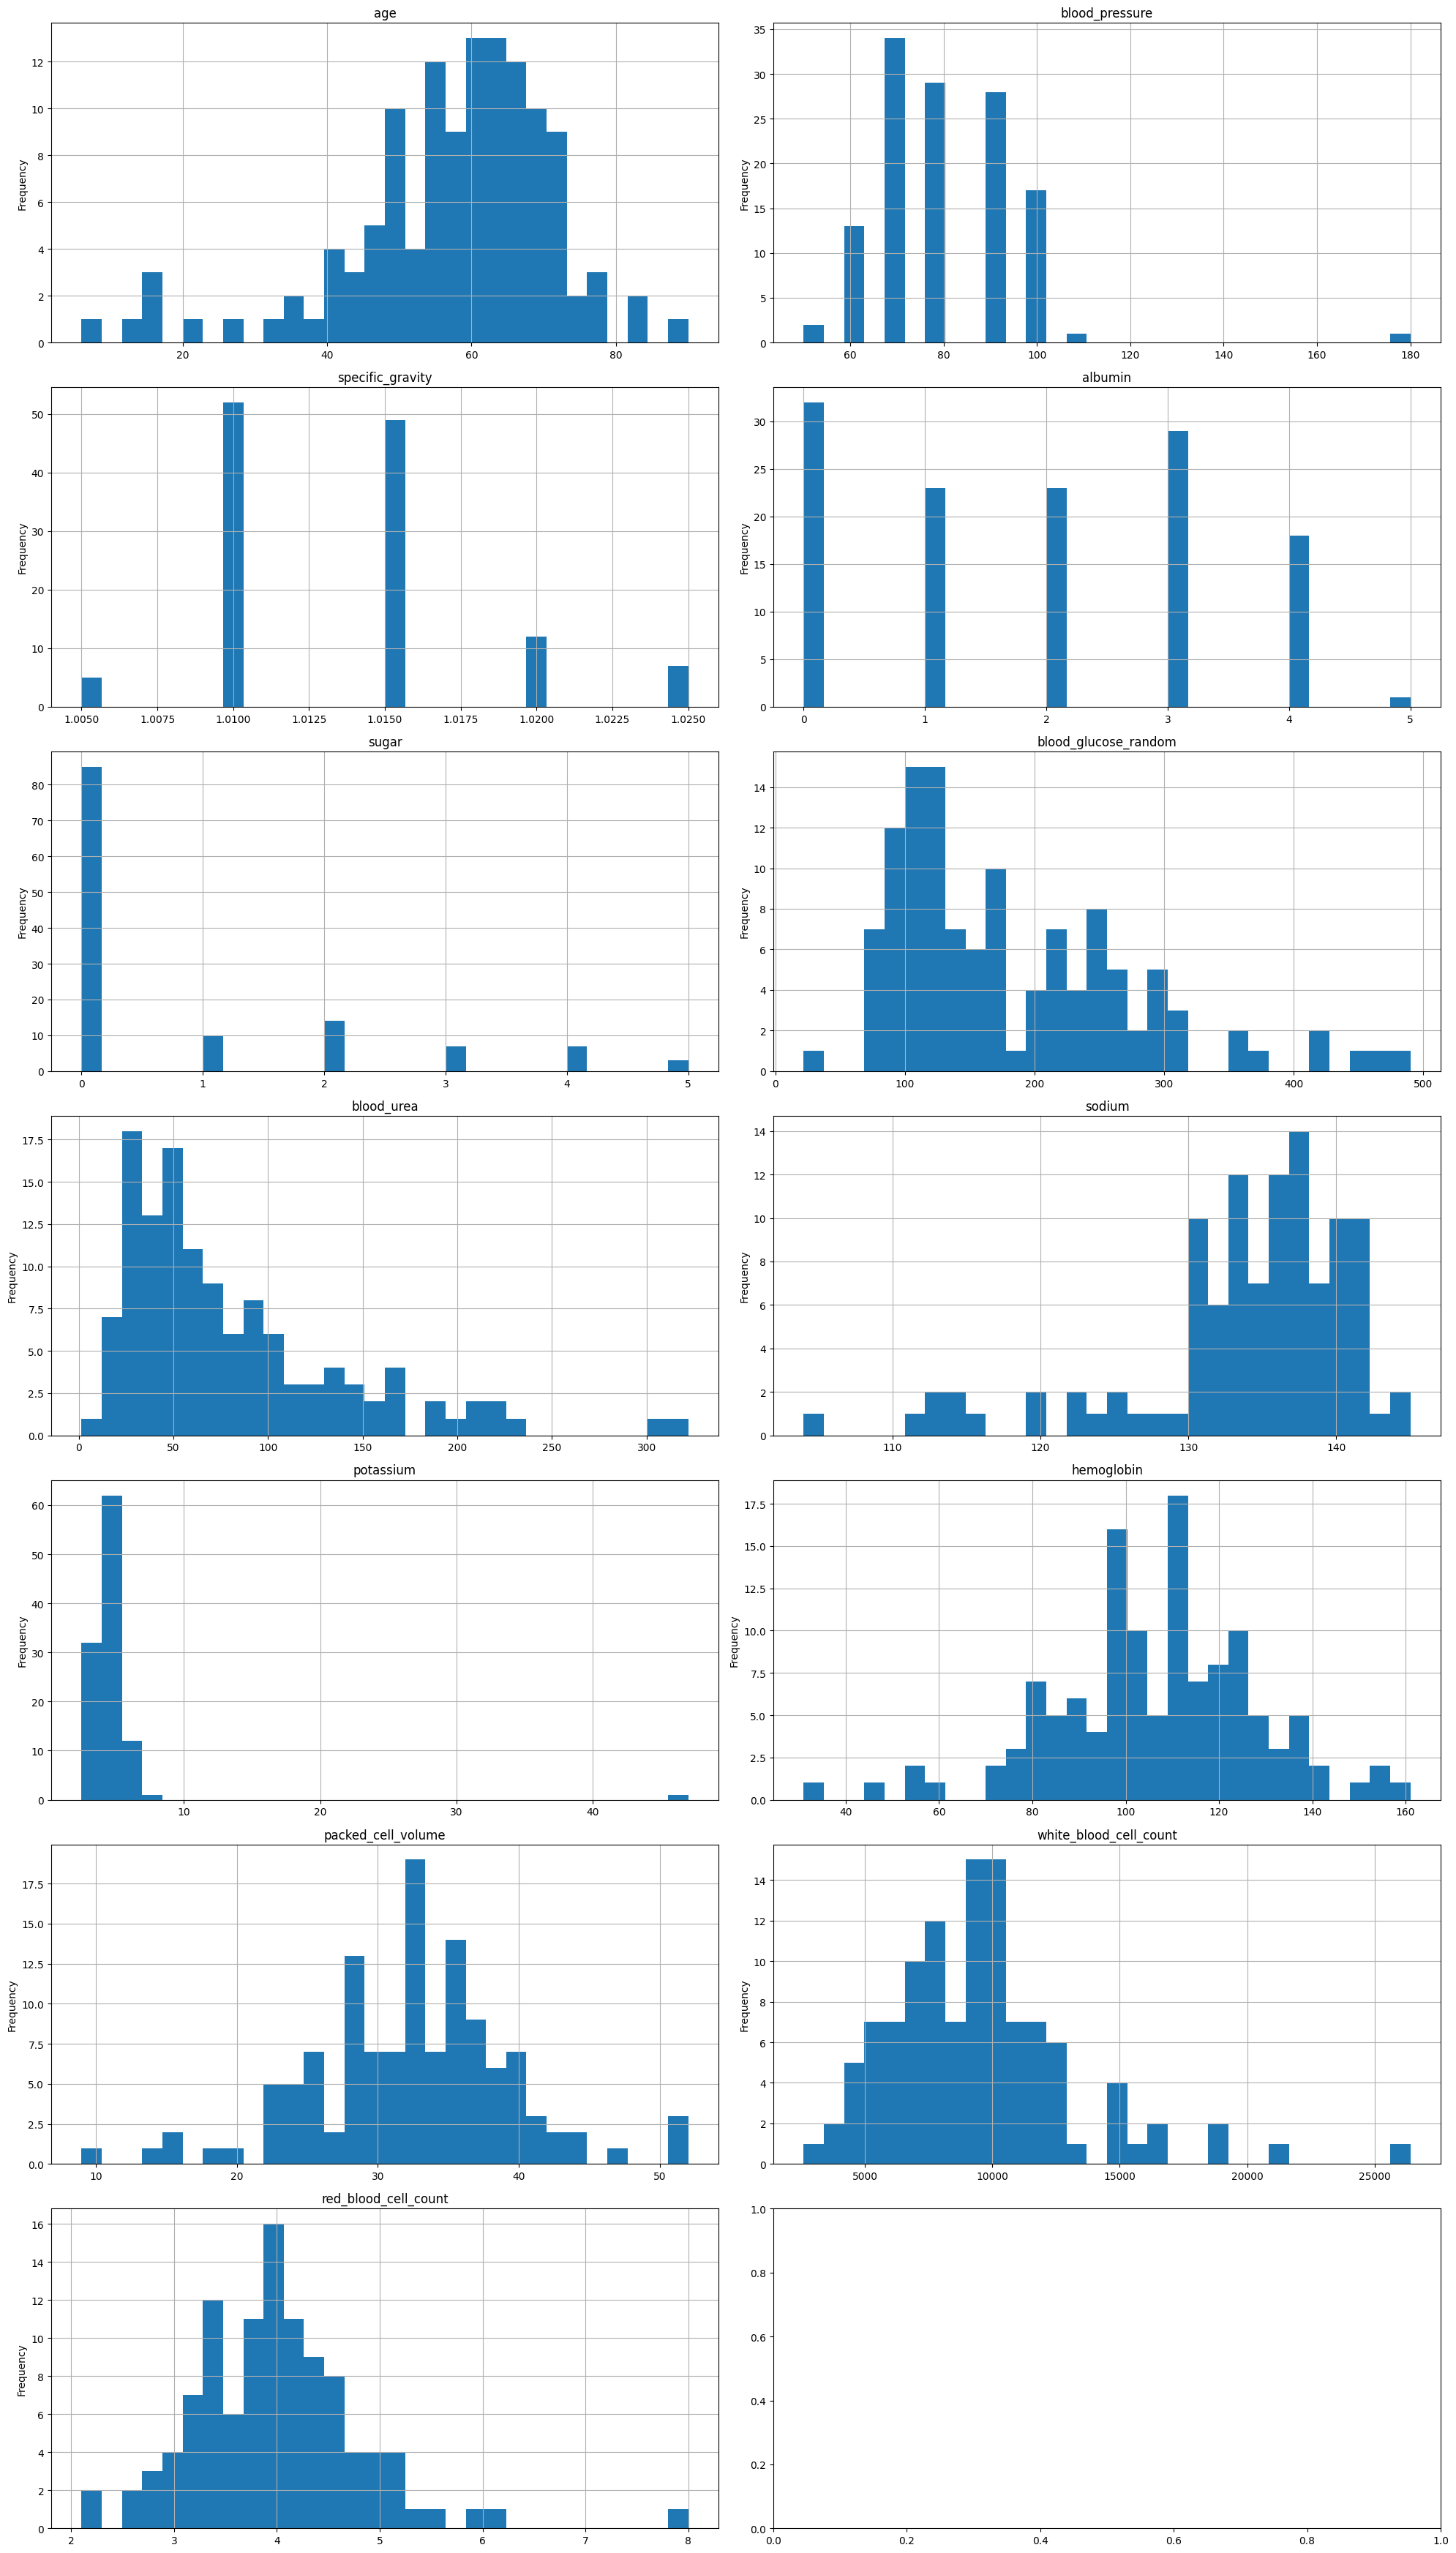

In [10]:
import numpy as np


def analyze_dataframe(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = (len(numerical_columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    for i, col in enumerate(numerical_columns):
        ax = axes[i // n_cols, i % n_cols]
        df[col].hist(ax=ax, bins=30)
        ax.set_title(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

analyze_dataframe(df_affected)

## Outliers for affected group
- Blood pressure: Values above 120 are considered abnormal.
- Potassium: There is an outlier with many times the regular amount of potassium for an average human.
- Blood Urea: The values after 300 seem to be outliers
- White Blood Cell Count: The largest values seem to be outliers
- Red Blood Cell Count: The values after 7 are outliers

All of the above outliers should be subject to some filtering, to get the outlier values removed.
Code sample below:

In [11]:
df_affected = df_affected[df_affected.blood_pressure < 120]
df_affected = df_affected[df_affected.potassium < 10]
df_affected = df_affected[df_affected.blood_urea < 250]
df_affected = df_affected[df_affected.white_blood_cell_count < 20000]
df_affected = df_affected[df_affected.red_blood_cell_count < 7]
df_affected

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,114.0,3.7,95.0,29.0,12100.0,3.7,a
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,131.0,4.2,108.0,32.0,4500.0,3.8,a
12,68.0,70.0,1.015,3.0,1.0,208.0,72.0,138.0,5.8,97.0,28.0,12200.0,3.4,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,69.0,70.0,1.010,4.0,3.0,214.0,96.0,120.0,3.9,94.0,28.0,11500.0,3.3,a
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a


As we can see in the table above, all of the large outlier values have been filtered out.
Now we are going to plot the histograms for the control group

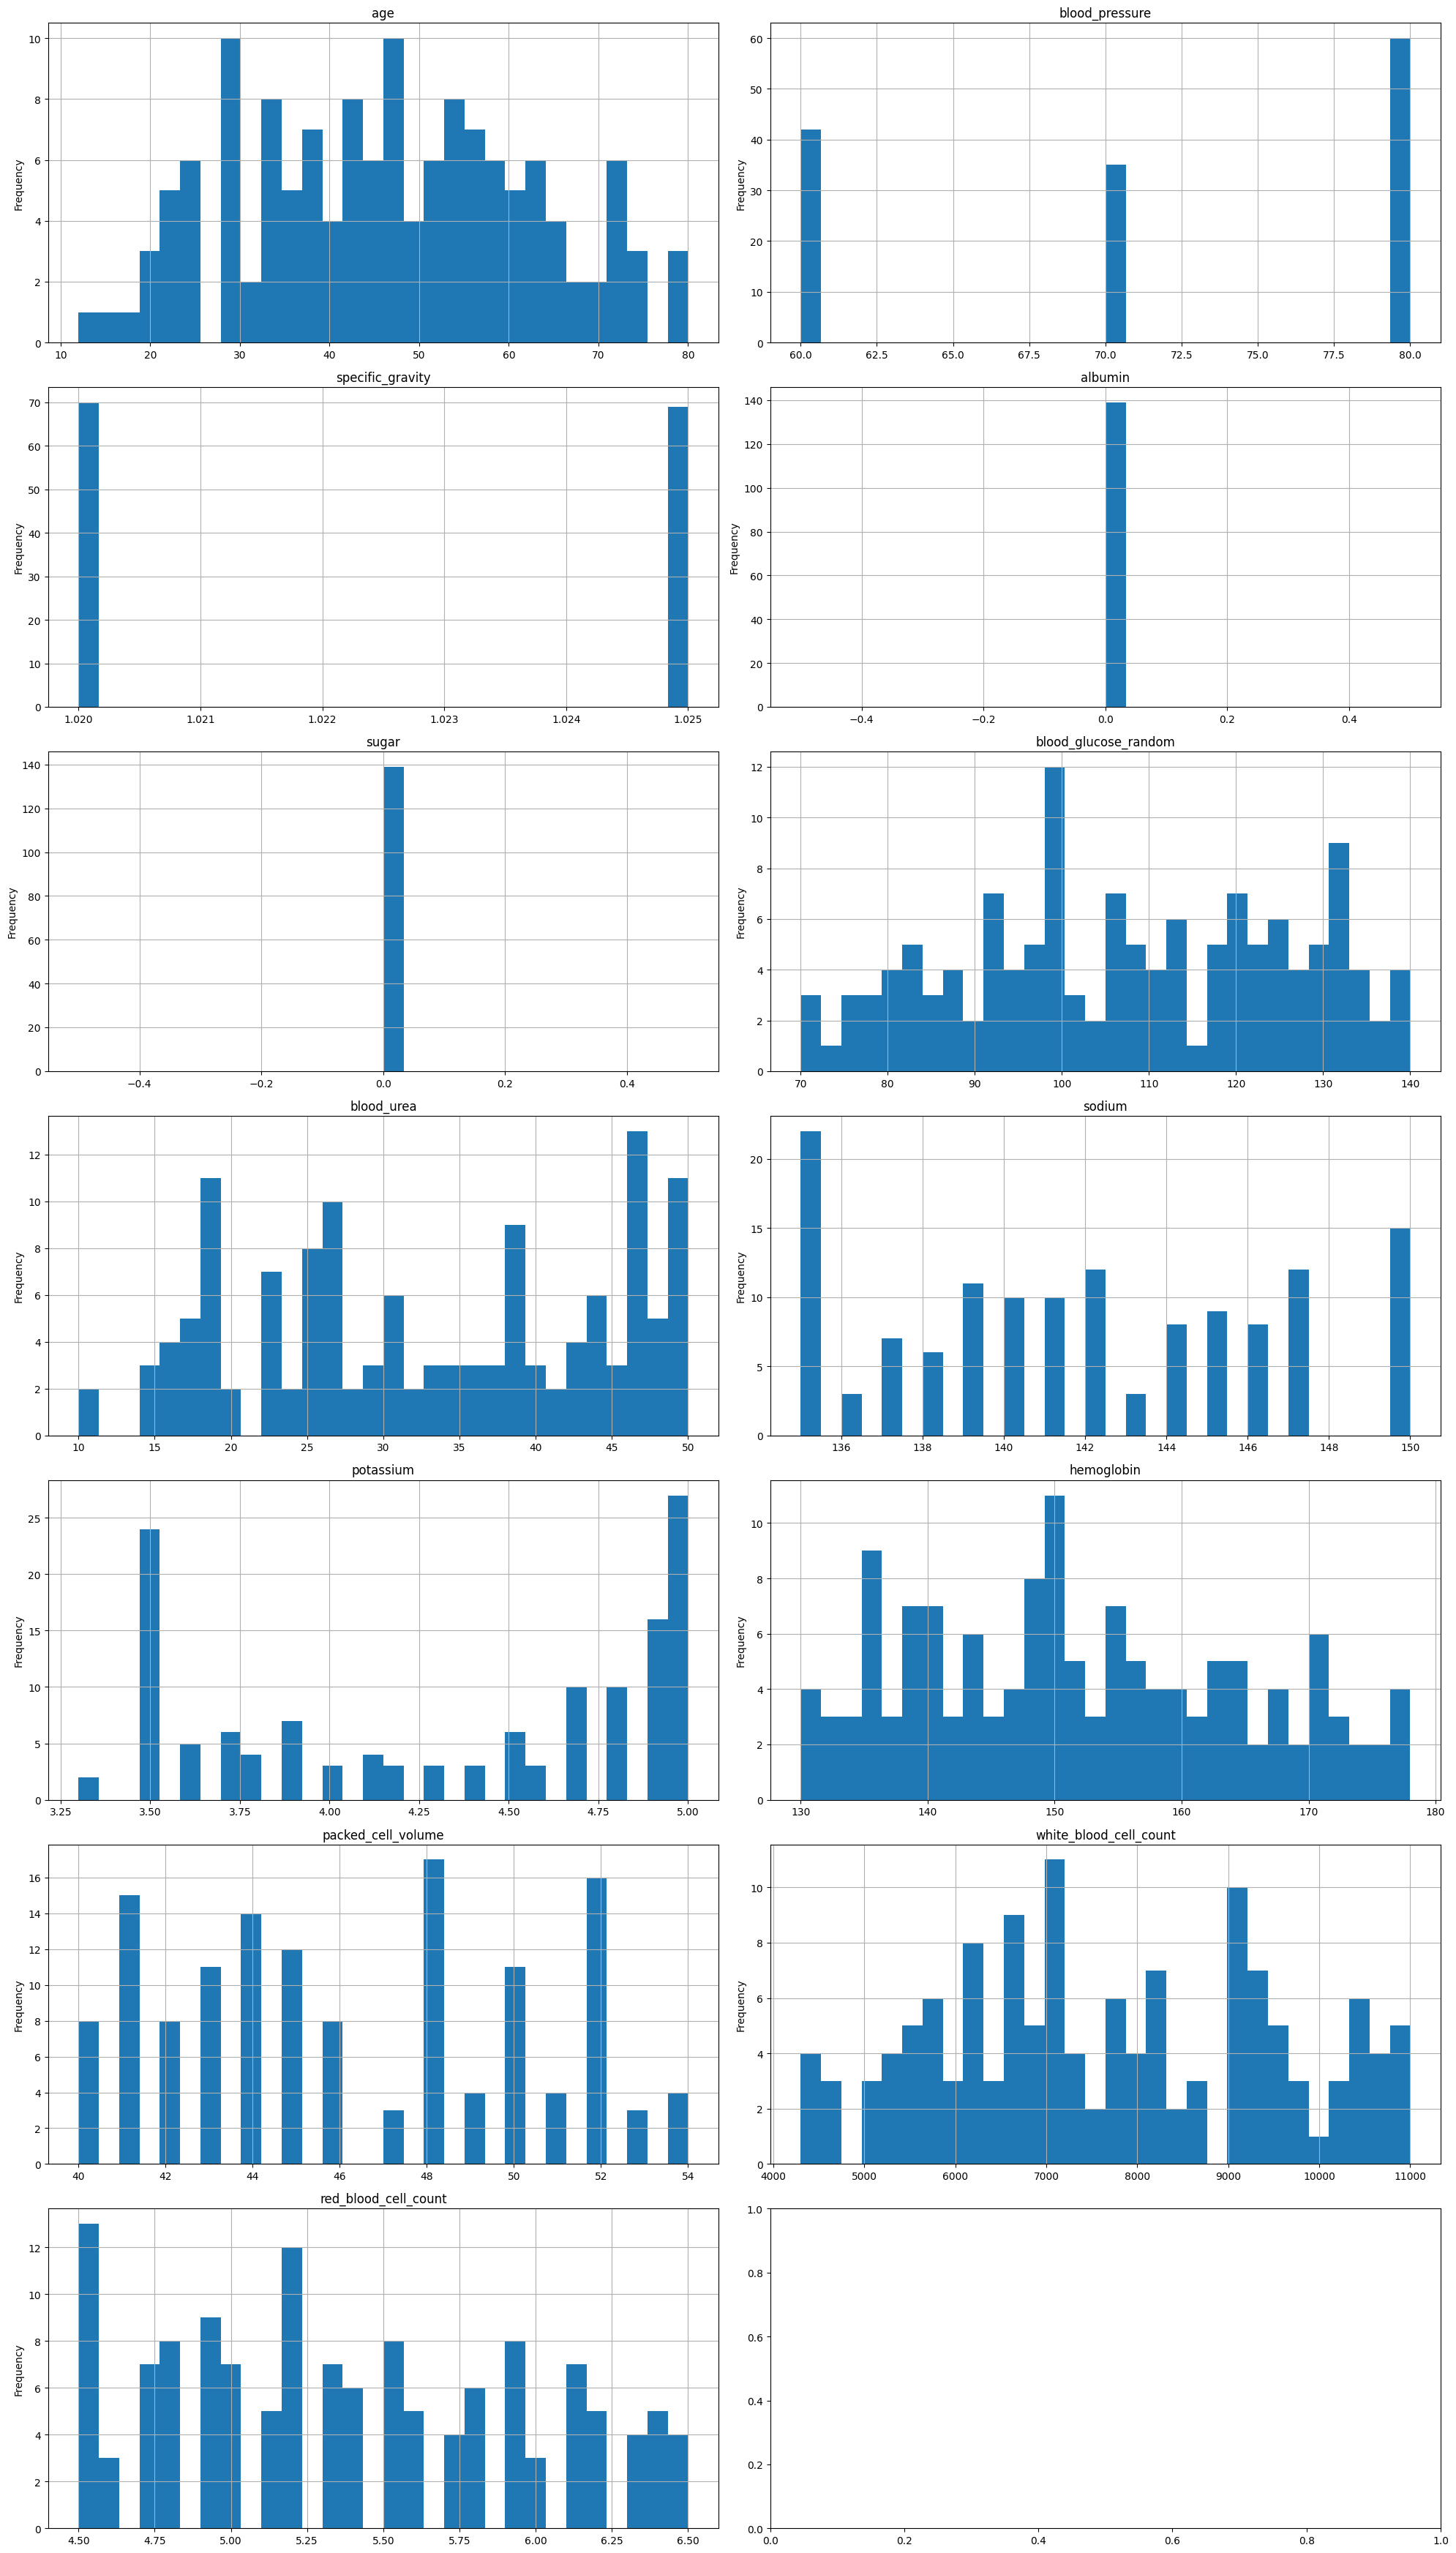

In [12]:
analyze_dataframe(df_control)

## Outliers for control group
- Blood pressure: The values look very strange for blood pressure. The data only has 3 different values, while blood pressure is a value that varies from human to human.
- Albumin: The value is 0 for all members of the control group, which is highly irregular.
- Sugar: The value is 0 for all members of the control group, which is highly irregular.

The readings are strange, but we cannot subject them to any filtering, because the data seems incorrect.